<a href="https://colab.research.google.com/github/choudharymahi74/ML-Intro-Project/blob/main/Ridge_%26_Lasso_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*objective* : To understand ridge and lasso regression

[Ridge Regression](https://www.youtube.com/watch?v=Q81RR3yKn30)

[Lasso Regression](https://www.youtube.com/watch?v=NGf0voTMlcs)

**Regularization Technique**

Ridge Regression uses L2 regularization, which adds a penalty equal to the square of the magnitude of coefficients to the loss function. This means that while Ridge regression shrinks the coefficients towards zero, it does not set any coefficients exactly to zero, thus retaining all predictors in the model.

Lasso Regression employs L1 regularization, which adds a penalty equal to the absolute value of the coefficients. This characteristic allows Lasso to set some coefficients exactly to zero, effectively performing feature selection and simplifying the model by excluding less important predictors.

***L1 regularization:***
L1 Regularization, adds the “absolute value of magnitude” of the coefficient as a penalty term to the loss function.

**L2 regularization:**
L2 Regularization, adds the “squared magnitude” of the coefficient as the penalty term to the loss function.

While "Ridge" is associated with "L2" regularization and "Lasso" is associated with "L1" regularization, they are not the same thing; "Ridge" and "Lasso" are specific regression techniques that use L2 and L1 regularization respectively, meaning they are different methods that apply the distinct penalty calculations of L1 and L2 to shrink model coefficients and prevent overfitting.

LOSS FUNCTION IN RIDGE REGRESSION:

Ridge regression adds the “squared magnitude” of the coefficient as the penalty term to the loss function.

*The highlighted part below represents the L2 regularization element.*

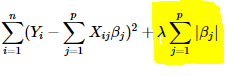

Here, if lambda is zero then you can imagine we get back OLS(ordinary least squares). However, if lambda is very large then it will add too much weight and lead to underfitting. Having said that, how we choose lambda is important. This technique works very well to avoid overfitting issues.

LOSS FUNCTION IN LASSO REGRESSION:

Lasso is an acronym for least absolute shrinkage and selection operator, and lasso regression adds the “absolute value of magnitude” of the coefficient as a penalty term to the loss function.

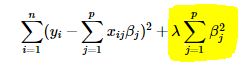

Again, if lambda is zero, then we'll get back OLS (ordinary least squares) whereas a very large value will make coefficients zero, which means it will become underfit.

# **SIMPLE LINEAR REGRESSION**

In [ ]:
#importing libraries
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as ply

In [ ]:
from sklearn.datasets import fetch_california_housing #importing dataset

In [ ]:
fetch_california_housing() #loading data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
df=fetch_california_housing() #saving data in df

In [ ]:
pd.DataFrame(df.data) #converting data into dataframe

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
dataset=pd.DataFrame(df.data) #saving dataframe in dataset

In [ ]:
dataset.columns=df.feature_names #naming columns
#dataset.head() #printing first 5 rows

In [ ]:
# setting up Independent and dependent features
X=dataset
Y=df.target
Y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19800,0.4999,15.0,11.596491,2.561404,131.0,2.298246,40.43,-123.32
18831,1.9650,23.0,6.058608,1.351648,669.0,2.450549,41.60,-123.41
16382,2.3750,4.0,4.504854,1.042071,1784.0,5.773463,38.00,-121.29
8820,1.6081,35.0,3.354132,1.069140,1108.0,1.868465,34.09,-118.35
1155,3.0446,26.0,5.657534,1.113014,790.0,2.705479,39.50,-121.44
...,...,...,...,...,...,...,...,...
18180,3.0047,9.0,4.008108,1.040541,1430.0,1.932432,37.37,-122.03
5005,3.1548,50.0,5.401760,1.105572,817.0,2.395894,34.01,-118.32
8086,4.6458,46.0,5.759336,1.053942,742.0,3.078838,33.81,-118.20
14321,1.3125,52.0,2.337209,1.063953,557.0,3.238372,32.71,-117.15


In [ ]:
# standardising data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
scaler.fit_transform(X_train)

array([[-1.77746699, -1.08765594,  2.69716007, ..., -0.11564518,
         2.24327541, -1.86941687],
       [-1.00597346, -0.45195679,  0.27822741, ..., -0.09103822,
         2.79100702, -1.9143757 ],
       [-0.79007533, -1.96174225, -0.40044808, ...,  0.44582806,
         1.10567898, -0.85534539],
       ...,
       [ 0.40568435,  1.37567823,  0.14750621, ...,  0.01047121,
        -0.85585559,  0.68824125],
       [-1.34956743,  1.85245259, -1.34726969, ...,  0.0362463 ,
        -1.37081694,  1.21276098],
       [-0.18919398,  1.29621584, -0.33168973, ..., -0.03850116,
        -0.74818186,  0.60831443]])

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
# cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [ ]:
cross_val_score(reg,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)

array([-0.56043671, -0.53859812, -0.5083233 , -0.52694032, -0.5502267 ])

In [ ]:
mse=cross_val_score(reg,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)

In [ ]:
np.mean(mse)

-0.5369050301172915

In [ ]:
# prediction
reg_pred=reg.predict(X_test)

In [ ]:
reg_pred

array([1.32743287, 2.72116153, 2.68802782, ..., 1.08877952, 2.71466874,
       0.86166863])

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
print("R2 score", r2_score(Y_test,reg_pred))

R2 score 0.6022830326398085


In [ ]:
print("RMSE:", np.sqrt(mean_squared_error(Y_test,reg_pred)))

RMSE: 0.7075251785162899


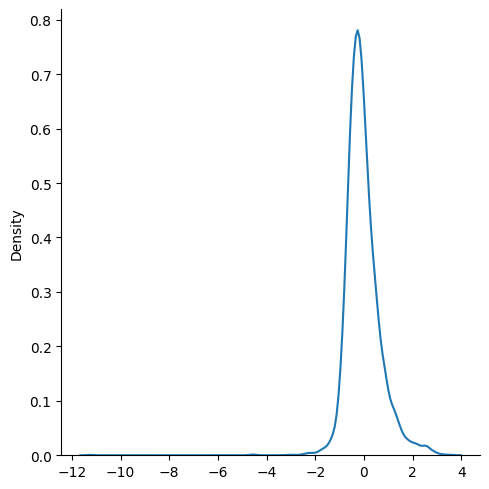

In [ ]:
import seaborn as sns
sns.displot(Y_test-reg_pred,kind='kde') # use kind='kde' as another parametre to see detailed view of the probability density in continuous manner

In [ ]:
print(reg.intercept_) # intercept
print(reg.coef_) #coefficients

2.078616144622095
[ 8.43563627e-01  1.24446160e-01 -2.72883349e-01  3.25692656e-01
  4.53039237e-04 -3.11597998e-02 -9.05325445e-01 -8.73864549e-01]


In [ ]:
# Try with test size as 30% and 40%
# Try scoring parametre as mean absolute error
# Try with cv with 10 times

# **RIDGE REGRESSION**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge=Ridge() #creating object

In [ ]:
Parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,60,80]}
RidgeCV=GridSearchCV(ridge,Parameters,scoring='neg_mean_squared_error',cv=5)
RidgeCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 60, 80]},
             scoring='neg_mean_squared_error')

In [ ]:
print(RidgeCV.best_params_)
print(RidgeCV.best_score_)

{'alpha': 1}
-0.5369044501253424


In [ ]:
RidgeCV.predict(X_test)

array([1.32766653, 2.72121792, 2.68765652, ..., 1.08917433, 2.71450827,
       0.86208432])

In [ ]:
Ridge_pred=RidgeCV.predict(X_test)

In [ ]:
# measuring R2 score and RMSE
print("R2 score", r2_score(Y_test,Ridge_pred))

R2 score 0.602319358481805


In [ ]:
print("RMSE:", np.sqrt(mean_squared_error(Y_test,Ridge_pred)))

RMSE: 0.7074928665496835


# **LASSO REGRESSION**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso=Lasso()

In [ ]:
Parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,60,80]}
lassoCV=GridSearchCV(lasso,Parameters,scoring='neg_mean_squared_error',cv=5)
lassoCV.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.804e+02, tolerance: 1.784e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.623e+02, tolerance: 1.795e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.044e+02, tolerance: 1.791e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 60, 80]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lassoCV.best_params_)
print(lassoCV.best_score_)

{'alpha': 0.001}
-0.5368229572136757


In [ ]:
lassoCV.predict(X_test)

array([1.33653211, 2.72584253, 2.67042374, ..., 1.09012171, 2.71531959,
       0.86888931])

In [ ]:
lasso_pred=lassoCV.predict(X_test)

In [ ]:
print("R2 score:", r2_score(Y_test,Ridge_pred))

R2 score: 0.602319358481805


In [ ]:
print("RMSE:", np.sqrt(mean_squared_error(Y_test,Ridge_pred)))

RMSE: 0.7074928665496835


Q.1] Apply ridge and lasso regression on a different dataset like load_diabetes()

Q.2]What is the use of GridSearchCV above?

Q.3]In above code rather than using GridSearchCV use different values of alpha manually.


In [45]:

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


data = load_diabetes()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Ridge Regression - MSE:", mse_ridge, ", R^2:", r2_ridge)
print("Lasso Regression - MSE:", mse_lasso, ", R^2:", r2_lasso)

Ridge Regression - MSE: 2892.0145657501726 , R^2: 0.45414652070698225
Lasso Regression - MSE: 2884.6242887352123 , R^2: 0.45554139902790414


GridSearchCV is a tool in sklearn used to perform hyperparameter tuning by searching over a specified grid of hyperparameter values. It automates the process of trying different combinations of hyperparameters to find the best set for a model, which ultimately helps in improving the model’s performance.

For models like Ridge and Lasso regression, hyperparameters like alpha (regularization strength) significantly impact the model’s performance. Manually trying different values for alpha can be time-consuming, and there is no guarantee that you’re testing the best set of values. GridSearchCV helps by:

Systematically searching for the best hyperparameters over a defined parameter grid. Performing cross-validation for each parameter combination to evaluate the model’s performance, providing a more robust estimate of how the model will perform on unseen data.

In [ ]:

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


data = load_diabetes()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]


ridge_results = []
lasso_results = []


print("Ridge Regression Results:")
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)

    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)

    ridge_results.append((alpha, mse_ridge, r2_ridge))
    print(f"Alpha: {alpha}, MSE: {mse_ridge:.4f}, R^2: {r2_ridge:.4f}")


print("\nLasso Regression Results:")
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)

    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)

    lasso_results.append((alpha, mse_lasso, r2_lasso))
    print(f"Alpha: {alpha}, MSE: {mse_lasso:.4f}, R^2: {r2_lasso:.4f}")

# Best performing alpha value based on MSE
best_ridge_alpha = min(ridge_results, key=lambda x: x[1])[0]
best_lasso_alpha = min(lasso_results, key=lambda x: x[1])[0]

print(f"\nBest alpha for Ridge based on MSE: {best_ridge_alpha}")
print(f"Best alpha for Lasso based on MSE: {best_lasso_alpha}")